# Southwest Airlines Flight Delays: End-to-End Pipeline

This notebook runs the complete workflow:
- Preprocessing: clean and prepare data
- Analysis: route patterns, seasonal trends, STL decomposition, plots
- ML: consumer-focused, realistic (no leakage), and operational pipelines

Best practices:
- Deterministic execution (fixed seeds when applicable)
- Time-based splits for ML to avoid leakage
- Clear directory structure with plots and outputs saved to `analysis/.../` folders



In [ ]:
# Setup: paths and options
from pathlib import Path
import sys
import os
import warnings

warnings.filterwarnings('ignore')

# In notebooks, __file__ is not defined; fall back to current working directory
if '__file__' in globals():
    PROJECT_ROOT = Path(__file__).resolve().parent
else:
    PROJECT_ROOT = Path.cwd()

DATA_DIR = PROJECT_ROOT / 'data'
CSV_DIR = DATA_DIR / 'csv_data'
PREPROCESSED_DIR = DATA_DIR / 'preprocessed_data'

# Add analysis modules to path
ANALYSIS_DIR = PROJECT_ROOT / 'analysis' / 'data_analysis'
ML_DIR = PROJECT_ROOT / 'analysis' / 'machine_learning'
PREPROC_DIR = PROJECT_ROOT / 'analysis' / 'preprocessing'
for p in [ANALYSIS_DIR, ML_DIR, PREPROC_DIR]:
    if str(p) not in sys.path:
        sys.path.append(str(p))

print('Project root:', PROJECT_ROOT)
print('Data dir:', DATA_DIR)
print('Preprocessed dir:', PREPROCESSED_DIR)


Project root: /Users/jacob/Desktop/Studie/Datascience/flight-delays-southwest
Data dir: /Users/jacob/Desktop/Studie/Datascience/flight-delays-southwest/data
Preprocessed dir: /Users/jacob/Desktop/Studie/Datascience/flight-delays-southwest/data/preprocessed_data


In [8]:
# Preprocessing: run complete pipeline (idempotent)
from analysis.preprocessing.complete_preprocessing_pipeline import complete_preprocessing_pipeline

final_df = complete_preprocessing_pipeline()
final_df.head()


🚀 SOUTHWEST AIRLINES COMPLETE PREPROCESSING PIPELINE
📂 STEP 1: LOADING DATA
------------------------------
Loading from: /Users/jacob/Desktop/Studie/Datascience/flight-delays-southwest/data/csv_data/features_added_southwest.csv
Original dataset: (5210031, 40)

📊 STEP 2: INITIAL DATA QUALITY ANALYSIS
------------------------------

DATA QUALITY ANALYSIS: ORIGINAL DATASET
Dataset shape: (5210031, 40)
Memory usage: 3832.42 MB

📊 MISSING VALUES ANALYSIS:
----------------------------------------
✅ No missing values found!

🔄 DUPLICATE ANALYSIS:
----------------------------------------
Duplicate rows: 0 (0.00%)

🔧 STEP 3: REMOVING REDUNDANT COLUMNS
------------------------------

🔧 REMOVING REDUNDANT COLUMNS
--------------------------------------------------
✅ Removing DepDelay (keeping DepDelayMinutes)
✅ Removing ArrDelay (keeping ArrDelayMinutes)
✅ Removing CRSDepTimeHourDis (keeping CRSDepTimeHour)
✅ Removing WheelsOffHourDis (keeping WheelsOffHour)
✅ Removing CRSArrTimeHourDis (keeping C

,Marketing_Airline_Network,DepTime,DepDelayMinutes,TaxiOut,TaxiIn,ArrTime,ArrDelayMinutes,CRSElapsedTime,ActualElapsedTime,AirTime,...,DestState,CarrierName,Year,Month,Day,DayOfWeek,Quarter,Season,Route,DelaySeverity
0,WN,2038.0,0.0,14.0,2.0,2321.0,0.0,160.0,163.0,147.0,...,CA,Southwest Airlines,2018,1,7,6,1,Winter,Seattle → San Diego,On Time
1,WN,1234.0,0.0,10.0,4.0,1436.0,0.0,130.0,122.0,108.0,...,CA,Southwest Airlines,2018,1,7,6,1,Winter,Seattle → San Jose,On Time
2,WN,640.0,0.0,19.0,4.0,851.0,0.0,130.0,131.0,108.0,...,CA,Southwest Airlines,2018,1,7,6,1,Winter,Seattle → San Jose,On Time
3,WN,1636.0,0.0,13.0,4.0,1843.0,0.0,125.0,127.0,110.0,...,CA,Southwest Airlines,2018,1,7,6,1,Winter,Seattle → San Jose,On Time
4,WN,1557.0,12.0,21.0,3.0,1746.0,16.0,105.0,109.0,85.0,...,CA,Southwest Airlines,2018,1,7,6,1,Winter,Seattle → Sacramento,Minor Delay


🚀 SOUTHWEST AIRLINES COMPREHENSIVE DATA ANALYSIS
📂 LOADING SOUTHWEST AIRLINES DATA
Loading data from: /Users/jacob/Desktop/Studie/Datascience/flight-delays-southwest/data/preprocessed_data/southwest_final_preprocessed.csv
✅ Data loaded successfully: (3563338, 42)
Date range: 2018-01-01 00:00:00 to 2023-04-30 00:00:00
Memory usage: 3024.50 MB
Columns: ['Marketing_Airline_Network', 'DepTime', 'DepDelayMinutes', 'TaxiOut', 'TaxiIn', 'ArrTime', 'ArrDelayMinutes', 'CRSElapsedTime', 'ActualElapsedTime', 'AirTime', 'Distance', 'DistanceGroup', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'DayofWeek', 'Holidays', 'CRSDepTimeMinute', 'CRSDepTimeHour', 'WheelsOffMinute', 'WheelsOffHour', 'CRSArrTimeMinute', 'CRSArrTimeHour', 'WheelsOnMinute', 'WheelsOnHour', 'CRSElapsedTimeGorup', 'DepDate', 'OriginCity', 'OriginState', 'DestCity', 'DestState', 'CarrierName', 'Year', 'Month', 'Day', 'DayOfWeek', 'Quarter', 'Season', 'Route', 'DelaySeverity']

ANALYSIS PIPELIN

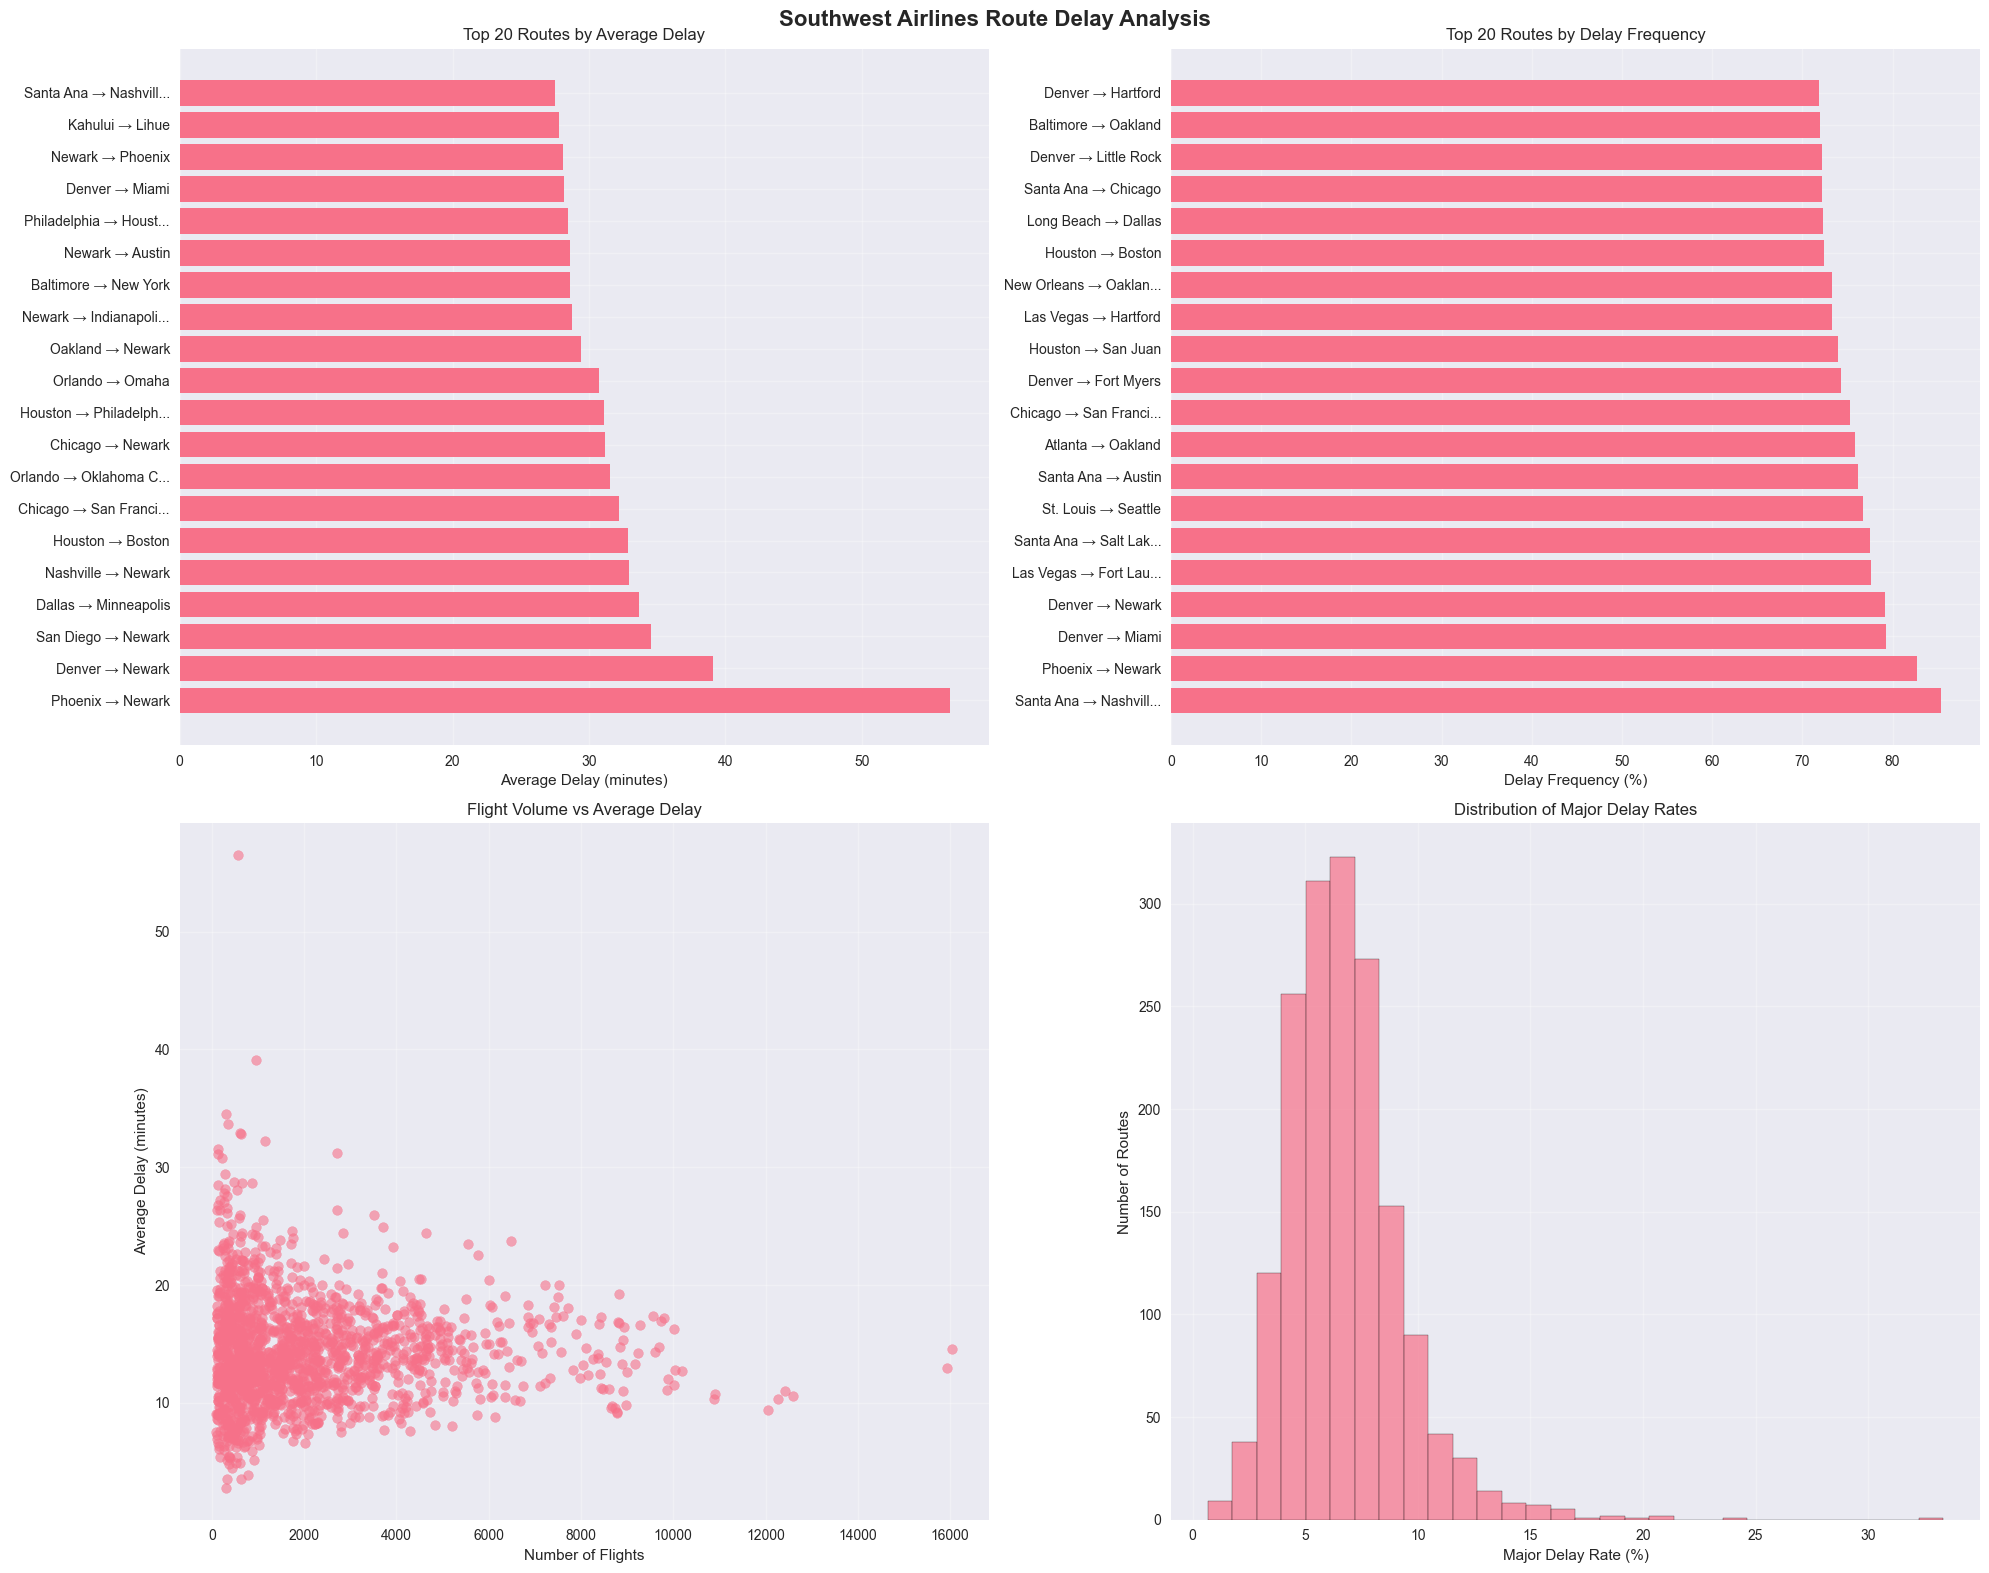

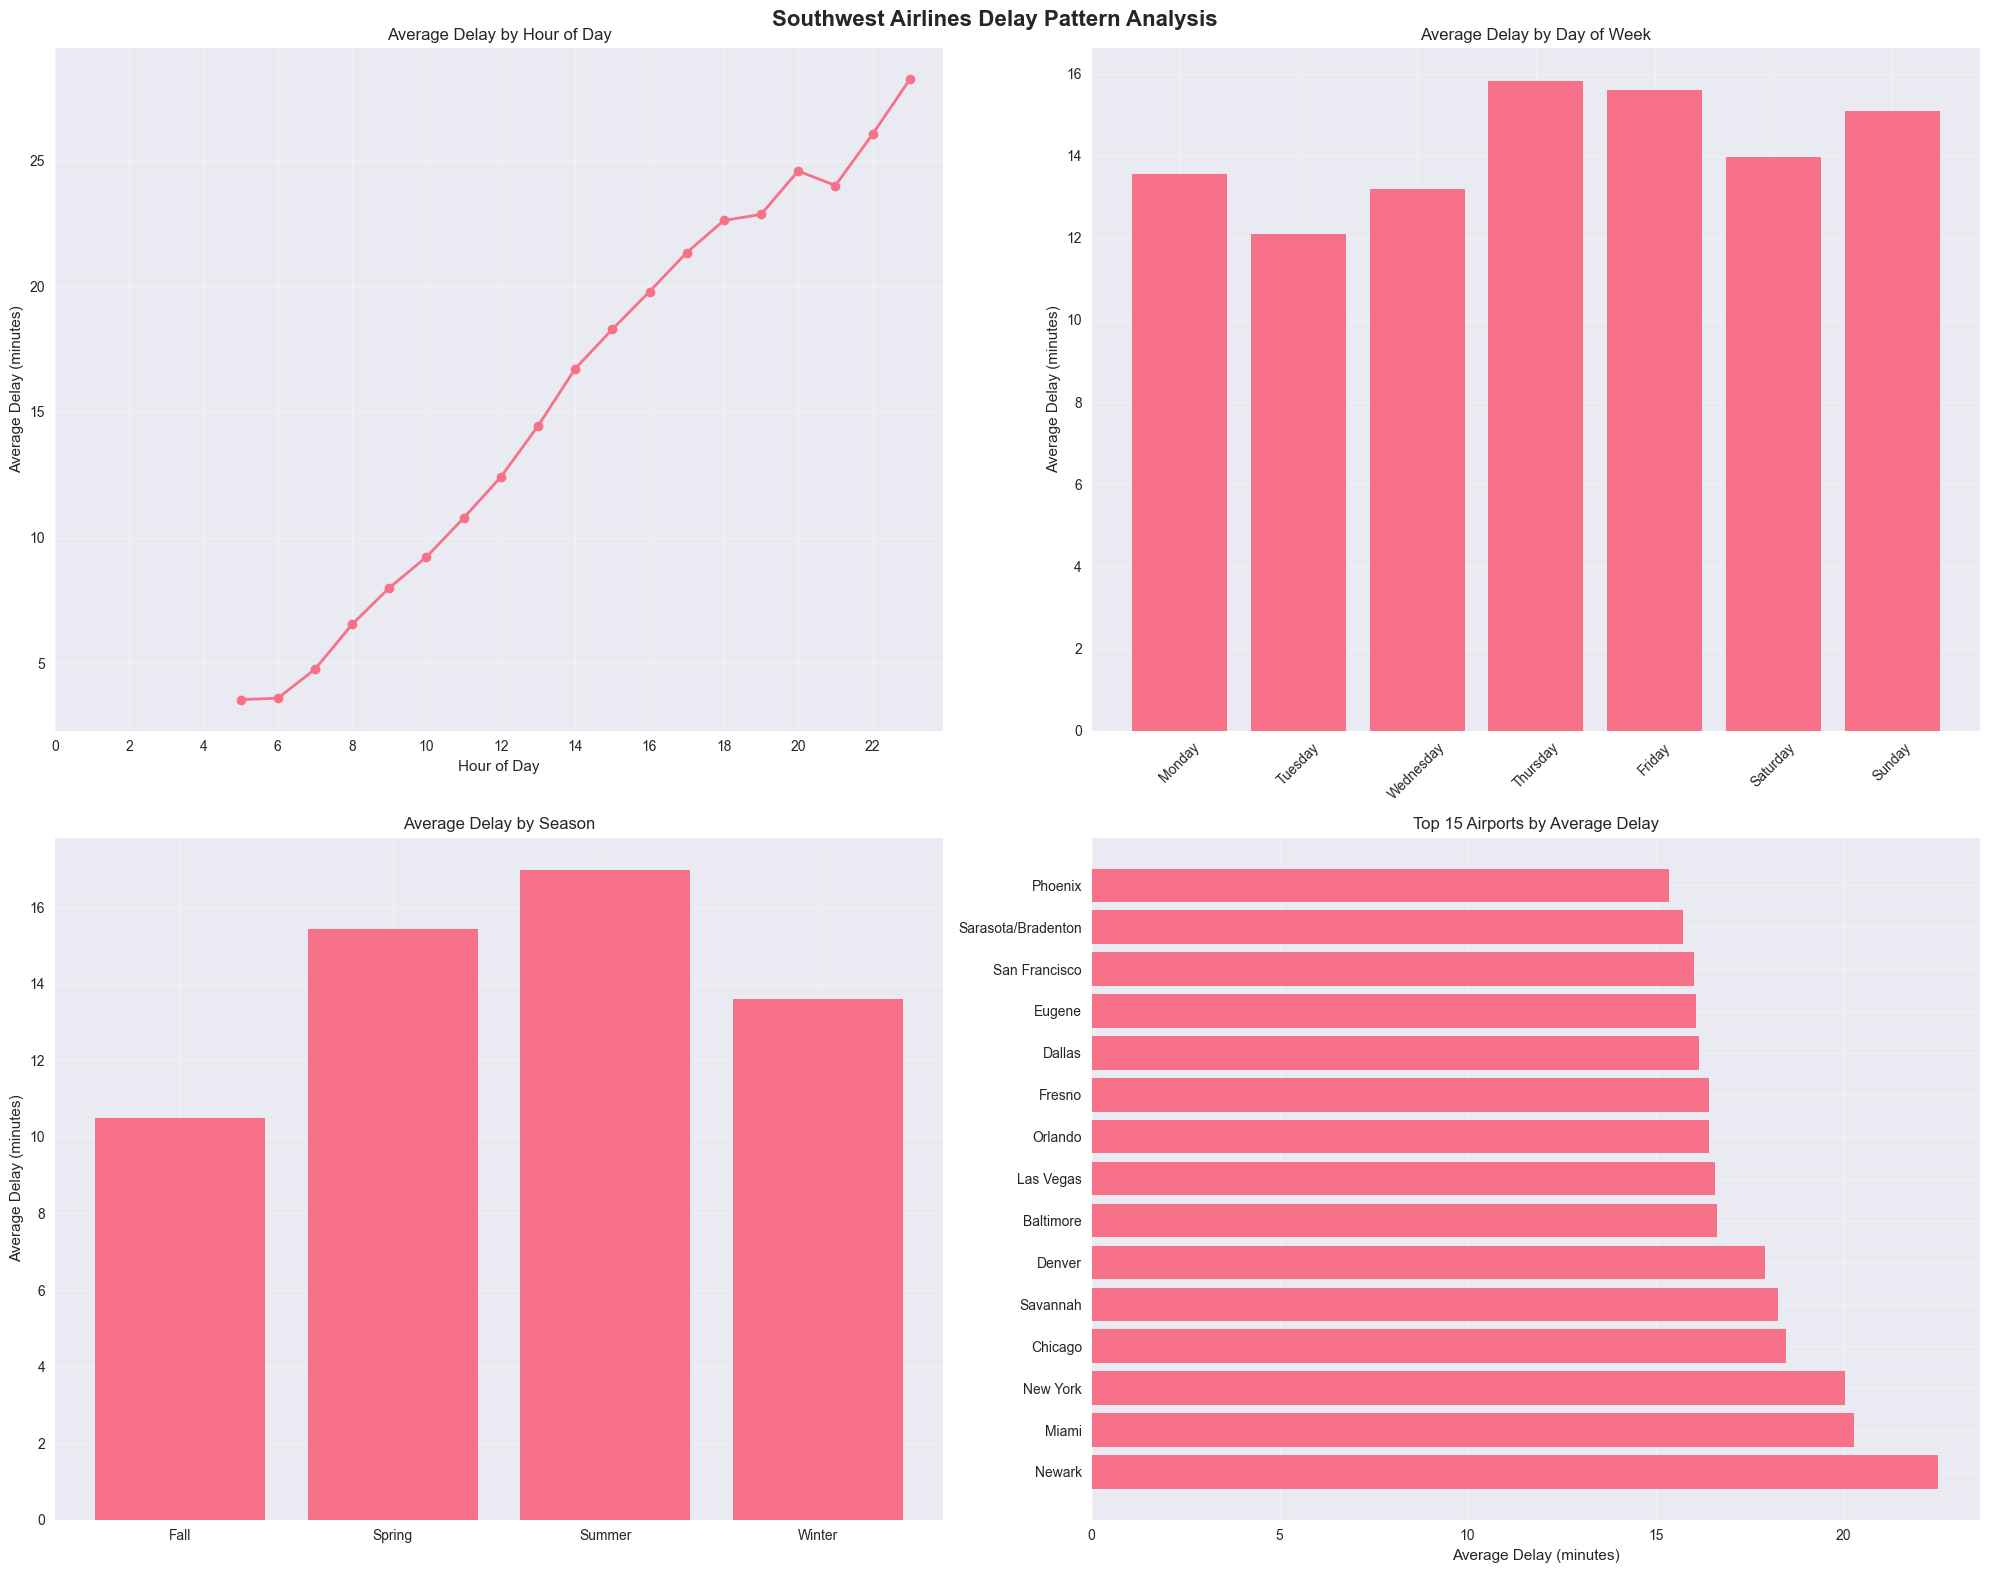

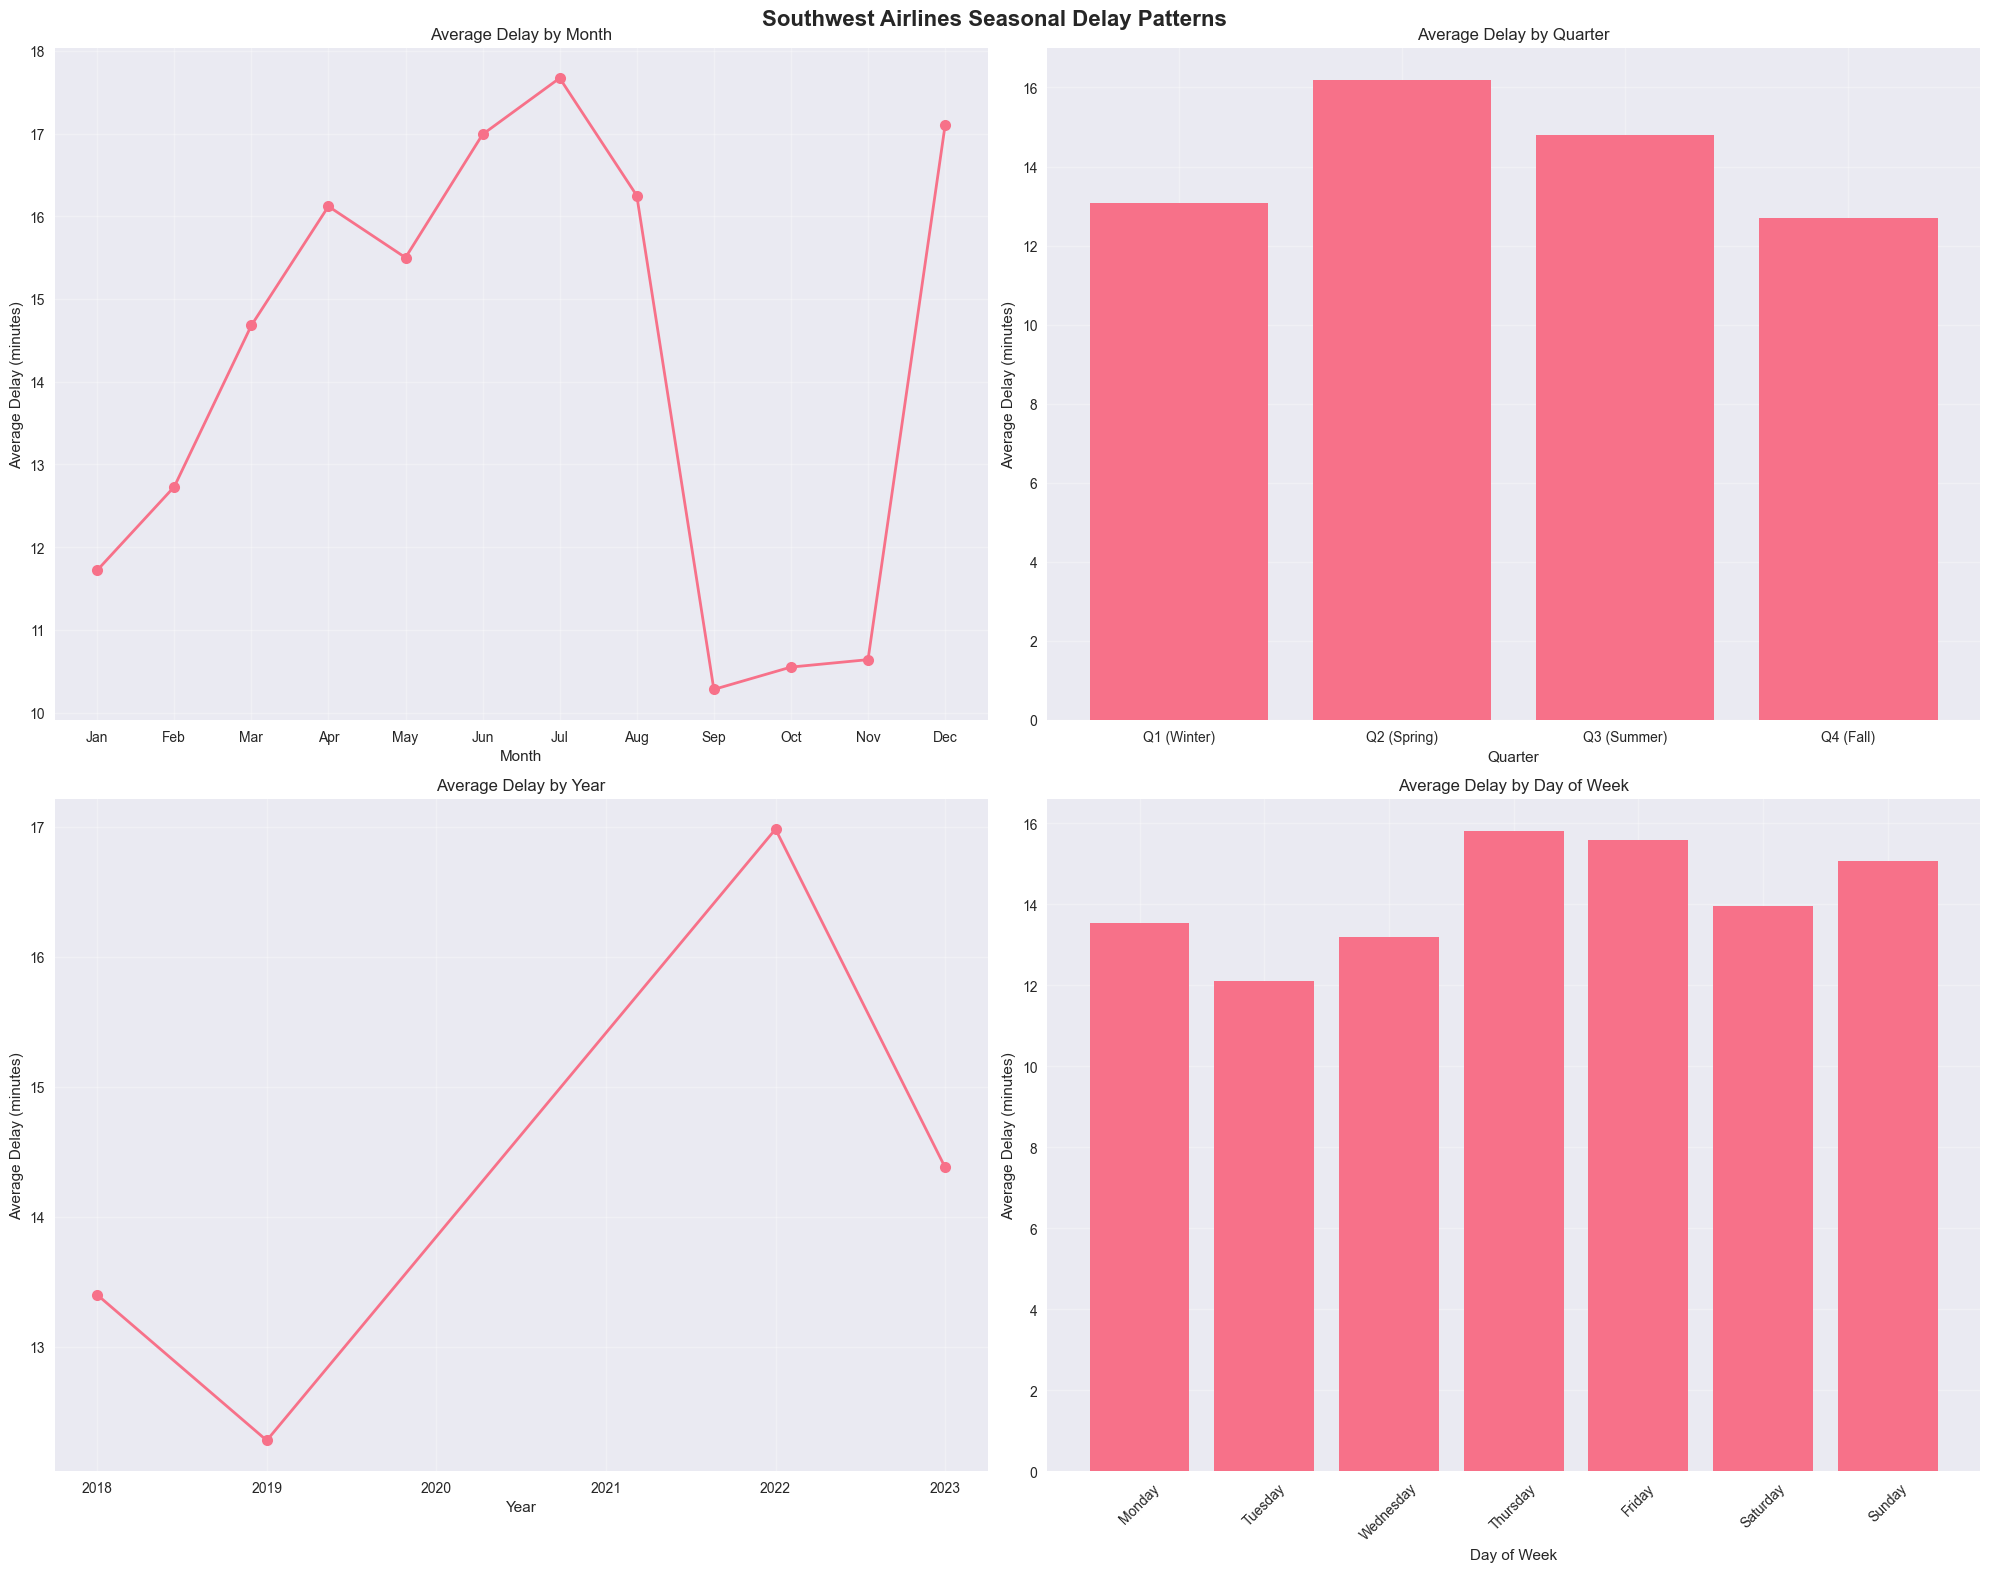

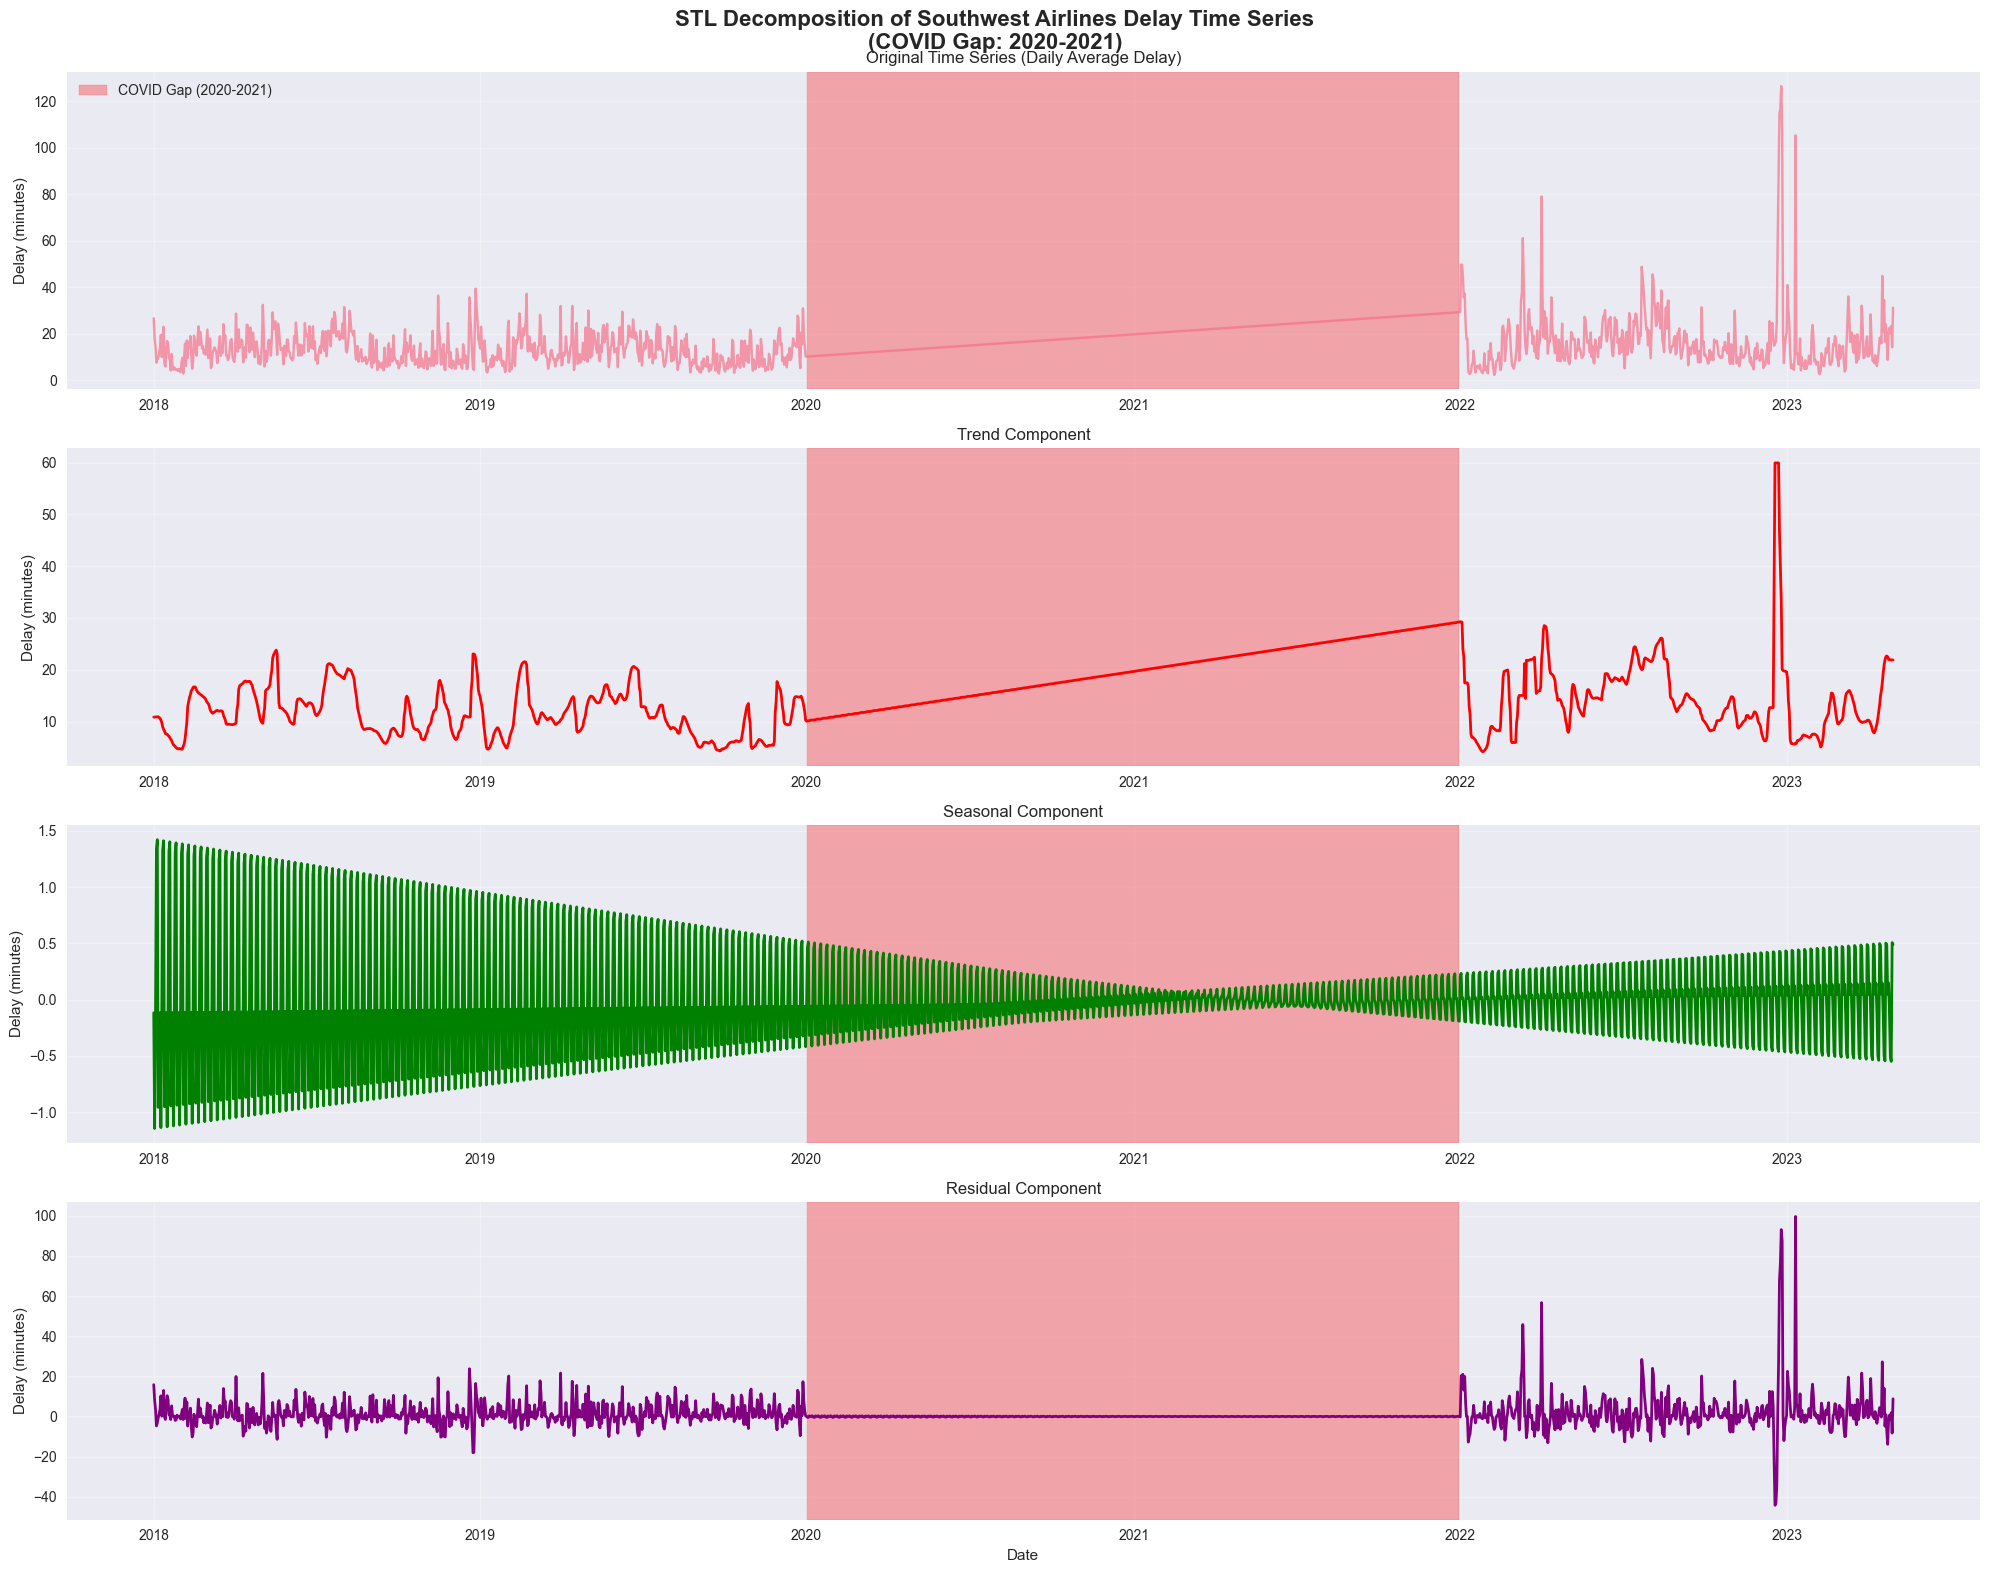

✅ All visualizations saved to: /Users/jacob/Desktop/Studie/Datascience/flight-delays-southwest/analysis/data_analysis/analysis_plots

🎯 PREDICTIVE INSIGHTS AND RECOMMENDATIONS
KEY INSIGHTS FOR DELAY PREDICTION:
--------------------------------------------------
1. Route Risk:
   Finding: 278 routes identified as high-risk
   Recommendation: Implement proactive monitoring and contingency planning for these routes

2. Time Patterns:
   Finding: Worst departure hours: 23:00, 22:00, 20:00
   Recommendation: Consider adjusting schedules or adding buffer time during peak delay hours

3. Seasonal Patterns:
   Finding: Highest delays in Jul (17.7 min), lowest in Sep (10.3 min)
   Recommendation: Adjust operational capacity and staffing during high-risk months

4. Long-term Trends:
   Finding: Overall delay trend is stable (slope: 0.0040)
   Recommendation: Monitor trend changes and implement interventions if delays are increasing

MACHINE LEARNING MODEL RECOMMENDATIONS:
-----------------------

In [9]:
# Analysis: run unified analysis and save plots
from analysis.data_analysis.unified_analysis import run_all as run_analysis

analysis_ok = run_analysis(data_path=str(PREPROCESSED_DIR / 'southwest_final_preprocessed.csv'))
print('Analysis completed:', analysis_ok)


In [10]:
# ML: Consumer pipeline (two-stage model)
from analysis.machine_learning.unified_ml import run_consumer

consumer_models = run_consumer(data_path=str(PREPROCESSED_DIR / 'southwest_final_preprocessed.csv'))
print('Consumer pipeline completed')


🚀 CONSUMER-FOCUSED ML PIPELINE
📂 LOADING CONSUMER-FOCUSED ML DATASET
Dataset loaded: (3563338, 42)
Years in dataset: [np.int64(2018), np.int64(2019), np.int64(2022), np.int64(2023)]
✅ COVID data successfully removed

🎯 CREATING CONSUMER-VISIBLE FEATURES
Consumer-visible features:
✅ OriginCity: Origin Airport
✅ DestCity: Destination Airport
✅ CRSDepTimeHour: Departure Hour
✅ DayOfWeek: Day of Week
✅ Season: Season

Delay Statistics:
Total flights: 3,563,338
Delayed flights: 1,610,288 (45.2%)
On-time flights: 1,953,050 (54.8%)

🤖 PREPARING CONSUMER ML DATASET
Categorical features: ['OriginCity', 'DestCity', 'Season']
Numerical features: ['HourOfDay', 'DayOfWeek']

Encoding categorical features...
Prepared targets. Base numeric features: 5

📅 CREATING TIME-BASED SPLITS
Training set: (2182425, 8) (2018-2019)
Test set: (1380913, 8) (2022-2023)
Features used (with priors if available): 8

Classification targets:
  Training - Delayed: 928,594 (42.5%)
  Test - Delayed: 681,694 (49.4%)

Regress

In [11]:
# ML: Realistic pipeline (pre-flight features only)
from analysis.machine_learning.unified_ml import run_realistic

realistic_results = run_realistic(data_path=str(PREPROCESSED_DIR / 'southwest_final_preprocessed.csv'))
print('Realistic pipeline completed:', realistic_results)


🚀 REALISTIC SOUTHWEST MODEL ANALYSIS
📂 LOADING DATA FOR REALISTIC MODEL


Dataset loaded: (500000, 42)

🎯 CREATING REALISTIC PRE-FLIGHT FEATURES
REALISTIC PRE-FLIGHT FEATURES:
----------------------------------------
✅ CRSDepTimeHour: Scheduled departure hour
✅ DayOfWeek: Day of week
✅ Season: Season
✅ OriginCity: Origin airport
✅ DestCity: Destination airport
✅ Distance: Flight distance

✅ Realistic features created
Total realistic features: 11

🤖 PREPARING REALISTIC DATASET
Categorical features: ['OriginCity', 'DestCity', 'Season']
Numerical features: ['HourOfDay', 'DayOfWeek', 'IsWeekend', 'IsEvening', 'IsMorning', 'IsPeakHour', 'Distance', 'DistanceGroup']

Encoding categorical features...
Feature matrix shape: (500000, 11)
Classification target shape: (500000,)
Regression target shape: (500000,)

📅 CREATING TIME-BASED SPLITS
Training set: (400000, 11)
Test set: (100000, 11)
Note: Using random split due to limited year data in sample

🚀 TRAINING REALISTIC MODELS
Training Classification Model...
✅ Classification model trained

Training Regression Model...

In [12]:
# ML: Operational pipeline (actionable insights)
from analysis.machine_learning.unified_ml import run_operational

operational_models = run_operational(data_path=str(PREPROCESSED_DIR / 'southwest_final_preprocessed.csv'))
print('Operational pipeline completed')


🚀 SOUTHWEST OPERATIONAL ML PIPELINE
📂 LOADING SOUTHWEST OPERATIONAL DATASET
Dataset loaded: (3563338, 42)
Years in dataset: [np.int64(2018), np.int64(2019), np.int64(2022), np.int64(2023)]
✅ COVID data successfully removed

🔍 OPERATIONAL FEATURE ANALYSIS
Essential operational features:
✅ CRSDepTimeHour: Departure Hour (operational planning)
✅ DayOfWeek: Day of Week (schedule optimization)
✅ Season: Season (seasonal planning)
✅ OriginCity: Origin Airport (route management)
✅ DestCity: Destination Airport (route management)
✅ Distance: Flight Distance (fuel planning)
✅ TaxiOut: Taxi Out Time (gate efficiency)
✅ TaxiIn: Taxi In Time (gate efficiency)
✅ WeatherDelay: Weather Delays (external factor)
✅ CarrierDelay: Southwest Delays (internal control)
✅ NASDelay: Air Traffic Delays (external factor)
✅ LateAircraftDelay: Previous Flight Delays (cascade effect)

DELAY CAUSE ANALYSIS (Actionable Insights):
--------------------------------------------------
WeatherDelay:
  Avg delay: 0.3 min
  

## Results Summary and Next Steps

- Preprocessing completed and saved to `data/preprocessed_data/southwest_final_preprocessed.csv`.
- Analysis visualizations saved under `analysis/data_analysis/analysis_plots/`.
- Model testing plots saved under `analysis/machine_learning/model_testing_plots/` (from the tester when used).

Recommended next steps:
- Parameterize time windows and target definitions (e.g., major delay threshold).
- Integrate external weather/traffic data for improved predictive power.
- Persist trained models and add inference API/notebook for sample predictions.
- Schedule regular data refresh and retraining pipeline.

